# Comparison between the methods described in the chapter 6 of the Sutton & Barto book over the cliff world

This notebook implements SARSA, Q-Learning, Expected SARSA and Double-Q-Learning. They are compared to each other over the cliffworld environment, a Gridworld that contains a cliff. If the agent falls in, it gets a very negative reward (-100) and returns to the begining. We will observe that there are algorithms that take more risk and others than are more conservative.

In [1]:
import gym
# Install gym_gridworlds from @podondra
# Option 1: pip install gym_gridworlds
# Option 2: https://github.com/podondra/gym-gridworlds
import gym_gridworlds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.display import clear_output

In [2]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

class SarsaAgent:
    def __init__(self, alpha, epsilon = 0.1, gamma=0.9, n_actions=9):
        self.state_action_value = {}
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_actions=n_actions
    
    def get_q_value(self, s, a):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        if not a in self.state_action_value[s]:
            self.state_action_value[s][a] = random.random()
        
        return self.state_action_value[s][a]
    
    def set_q_value(self, s, a, value):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        self.state_action_value[s][a] = value
        
    def update_q_values(self, s ,a ,r ,s_prime, a_prime):
        current_q_value = self.get_q_value(s, a)
        td_error = r + self.gamma*self.get_q_value(s_prime, a_prime) - current_q_value
        update = self.alpha*td_error
        new_q_value = current_q_value + update
        self.set_q_value(s, a, new_q_value)
        return update
        
    def get_action(self, state):
        if not state in self.state_action_value:
            return random.randint(0,self.n_actions-1)
        # epsilon greedy
        if random.random() > self.epsilon:
            return max(self.state_action_value[state].items(), key=lambda x:x[1])[0]
        else:
            return random.randint(0,self.n_actions-1)
        
        
class QLearningAgent:
    def __init__(self, alpha, epsilon = 0.1, gamma=0.9, n_actions=9):
        self.state_action_value = {}
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_actions=n_actions
    
    def get_q_value(self, s, a):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        if not a in self.state_action_value[s]:
            self.state_action_value[s][a] = random.random()
        
        return self.state_action_value[s][a]
    
    def set_q_value(self, s, a, value):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        self.state_action_value[s][a] = value
        
    def update_q_values(self, s ,a ,r ,s_prime):
        current_q_value = self.get_q_value(s, a)
        next_q_value = max([self.get_q_value(s_prime, a_prime) for a_prime in range(self.n_actions)])
        td_error = r + self.gamma*next_q_value - current_q_value
        update = self.alpha*td_error
        new_q_value = current_q_value + update
        self.set_q_value(s, a, new_q_value)
        return update
        
    def get_action(self, state):
        if not state in self.state_action_value:
            return random.randint(0,self.n_actions-1)
        # epsilon greedy
        if random.random() > self.epsilon:
            return max(self.state_action_value[state].items(), key=lambda x:x[1])[0]
        else:
            return random.randint(0,self.n_actions-1)

        
class ExpectedSarsa:
    def __init__(self, alpha, epsilon = 0.1, gamma=0.9, n_actions=9):
        self.state_action_value = {}
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_actions=n_actions
    
    def get_q_value(self, s, a):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        if not a in self.state_action_value[s]:
            self.state_action_value[s][a] = random.random()
        
        return self.state_action_value[s][a]
    
    def set_q_value(self, s, a, value):
        if not s in self.state_action_value:
            self.state_action_value[s] = {}
        
        self.state_action_value[s][a] = value
        
    def update_q_values(self, s ,a ,r ,s_prime):
        current_q_value = self.get_q_value(s, a)
        q_values = [self.get_q_value(s_prime, a_prime) for a_prime in range(self.n_actions)]
        self.policy = softmax(q_values)
        expected_next_q_value = sum([p*q for (p, q) in zip(self.policy, q_values)])
        td_error = r + self.gamma*expected_next_q_value - current_q_value
        update = self.alpha*td_error
        new_q_value = current_q_value + update
        self.set_q_value(s, a, new_q_value)
        return update
        
    def get_action(self, state):
        if not state in self.state_action_value:
            return random.randint(0,self.n_actions-1)
        # epsilon greedy
        if random.random() > self.epsilon:
            return max(self.state_action_value[state].items(), key=lambda x:x[1])[0]
        else:
            return random.randint(0,self.n_actions-1)
        
class DoubleQLearningAgent:
    def __init__(self, alpha, epsilon = 0.1, gamma=0.9, n_actions=9):
        self.state_action_value_1 = {}
        self.state_action_value_2 = {}
        self.state_action_value = [self.state_action_value_1, self.state_action_value_2]
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        self.n_actions=n_actions
    
    def get_q_value(self, s, a, which):
        if not s in self.state_action_value[which]:
            self.state_action_value[which][s] = {}
        
        if not a in self.state_action_value[which][s]:
            self.state_action_value[which][s][a] = random.random()
        
        return self.state_action_value[which][s][a]
    
    def set_q_value(self, s, a, value, which):
        if not s in self.state_action_value[which]:
            self.state_action_value[which][s] = {}
        
        self.state_action_value[which][s][a] = value
        
    def update_q_values(self, s ,a ,r ,s_prime):
        if random.random() > 0.5:
            # update state-action 2
            behavior_policy = 0
            update_policy = 1
        else:
            # update state-action 1
            behavior_policy = 1
            update_policy = 0
    
        current_q_value = self.get_q_value(s, a, update_policy)
        next_action_current = np.argmax([self.get_q_value(s_prime, a_prime, update_policy) for a_prime in range(self.n_actions)])
        next_q_value = self.get_q_value(s_prime, next_action_current, behavior_policy)
        td_error = r + self.gamma*next_q_value - current_q_value
        update = self.alpha*td_error
        new_q_value = current_q_value + update
        self.set_q_value(s, a, new_q_value, update_policy)

        
        
        return update
        
    def get_action(self, state):
        avgs = {}
        
        for action in range(self.n_actions):
            avgs[action] = self.state_action_value[0].get(state, {}).get(action, random.random())/2
            avgs[action] += self.state_action_value[1].get(state, {}).get(action, random.random())/2
            
        # epsilon greedy
        if random.random() > self.epsilon:
            return max(avgs.items(), key=lambda x:x[1])[0]
        else:
            return random.randint(0,self.n_actions-1)

In [3]:
# Plot the value map and the policy
def plot_policy(state_action_value, terminal_state = [3,7], gridworld_size=[7,10]):
    vals=[]
    actions=[]
    action_dict = {0: "↑",
                   1: "→",
                  2: "↓",
                  3: "←",
                  4: "↗",
                  5: "↖",
                  6: "↙",
                  7: "↘",
                  8: "⥁",
                  np.nan: "X"}
    for i in range(gridworld_size[0]):
        for j in range(gridworld_size[1]):
            if (i,j) in state_action_value:
                action, value = max(state_action_value[(i,j)].items(), key=lambda x:x[1])
            else:
                value = np.nan
                action = np.nan
            vals.append(value)
            actions.append(action_dict[action])

    action_map = np.array(actions).reshape(gridworld_size)
    values_map = np.array(vals).reshape(gridworld_size)
    if terminal_state is not None:
        action_map[terminal_state[0],terminal_state[1]] = "T"

    plt.figure(figsize=(gridworld_size[1], gridworld_size[0]))
    plt.imshow(values_map, cmap=plt.cm.autumn)
    for i in range(gridworld_size[0]):
            for j in range(gridworld_size[1]):
                text = plt.text(j, i, action_map[i, j],
                               ha="center", va="center", color="k", size=20, alpha=1)
    plt.xticks(range(gridworld_size[1]))
    plt.yticks(range(gridworld_size[0]))

    plt.title("Policy map. Arrows indicate the action to take \n"+\
              "(T is terminal state and X means non-accessible state)\n"+\
              "The colors indicate the value of each state.")
    plt.colorbar()
    plt.show()
    
def train_agent(agent, env, sarsa_like_training=False, n_episodes=50000):
    episodes=0
    max_actions=75
    updates=[]
    returns=[]
    total_actions=[]
    while episodes < n_episodes:
        updates.append(0)
        returns.append(0)

        episodes+=1
        state = env.reset()
        action = agent.get_action(state)
        done=False
        c=0

        while (done==False) and (c<max_actions):
            c+=1
            state_prime, reward, done, _ = env.step(action)
            if sarsa_like_training:
                action_prime = agent.get_action(state_prime)
                upd=agent.update_q_values(state, action, reward, state_prime, action_prime)
            else:
                upd=agent.update_q_values(state, action, reward, state_prime)
                action_prime = agent.get_action(state_prime)

            state, action = state_prime, action_prime
            returns[-1]+=reward
            if updates[-1] < abs(upd):
                updates[-1] = abs(upd)
        total_actions.append(c)
        if c < max_actions:
            assert done==True
        if episodes %1000 ==0:
            clear_output(True)
            plt.figure(figsize=(16, 4))
            plt.subplot(131)
            plt.plot(pd.Series(returns).ewm(span=1000).mean())
            plt.title("Total returns")
            plt.xlabel("Episodes")
            plt.ylabel("Return ($G_t$)")
            plt.subplot(132)
            plt.plot(pd.Series(total_actions).ewm(span=1000).mean())
            plt.title("Total actions done until reaching the goal")
            plt.xlabel("Episodes")
            plt.ylabel("# actions needed")
            plt.subplot(133)
            plt.plot(pd.Series(updates).ewm(span=1000).mean())
            plt.title("Maximum update of value function")
            plt.xlabel("Episodes")
            plt.ylabel("Max value update")
            plt.show()
    print("Actions needed: {}".format(np.mean(total_actions[-5000:])))
    print("Expected return: {}".format(np.mean(returns[-5000:])))
    return(returns, total_actions)

## SARSA 

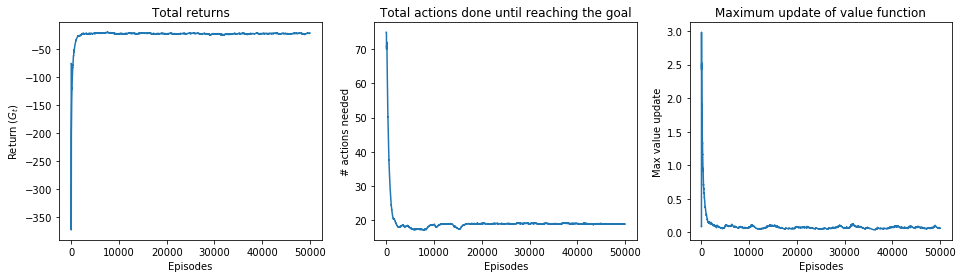

Actions needed: 18.8232
Expected return: -21.4962


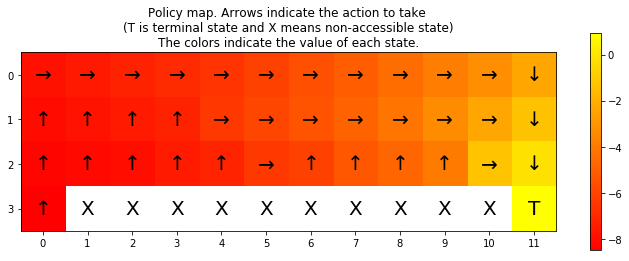

In [4]:
env = gym.make("Cliff-v0")
agent = SarsaAgent(alpha = 0.05, epsilon = 0.1, n_actions=int(env.action_space.n))

returns_sarsa, total_actions_sarsa = train_agent(agent, env, sarsa_like_training=True)
plot_policy(agent.state_action_value, gridworld_size=[4,12], terminal_state=[3,11])

## Q-Learning

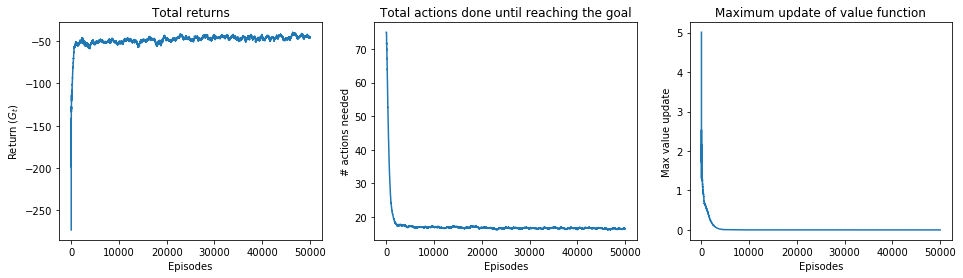

Actions needed: 16.4086
Expected return: -44.485


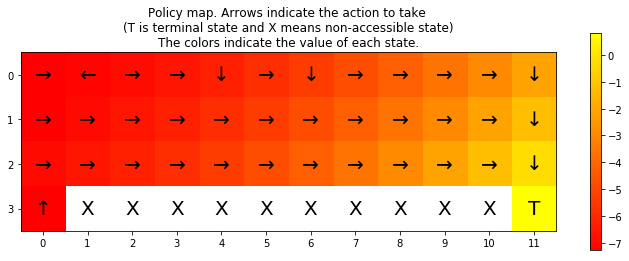

In [5]:
env = gym.make("Cliff-v0")
agent = QLearningAgent(alpha = 0.05, epsilon = 0.1, n_actions=int(env.action_space.n))

returns_qlearning, total_actions_qlearning = train_agent(agent, env, sarsa_like_training=False)
plot_policy(agent.state_action_value, gridworld_size=[4,12], terminal_state=[3,11])

## Expected SARSA 

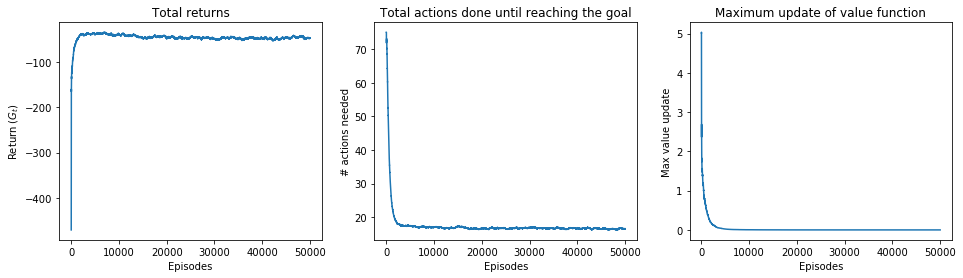

Actions needed: 16.5514
Expected return: -45.2812


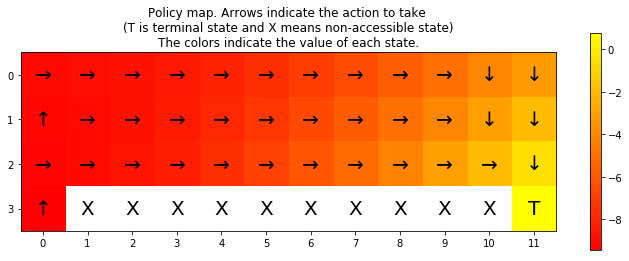

In [6]:
env = gym.make("Cliff-v0")
agent = ExpectedSarsa(alpha = 0.05, epsilon = 0.1, n_actions=int(env.action_space.n))

returns_expsarsa, total_actions_expsarsa = train_agent(agent, env, sarsa_like_training=False)
plot_policy(agent.state_action_value, gridworld_size=[4,12], terminal_state=[3,11])

## Double Q-Learning 

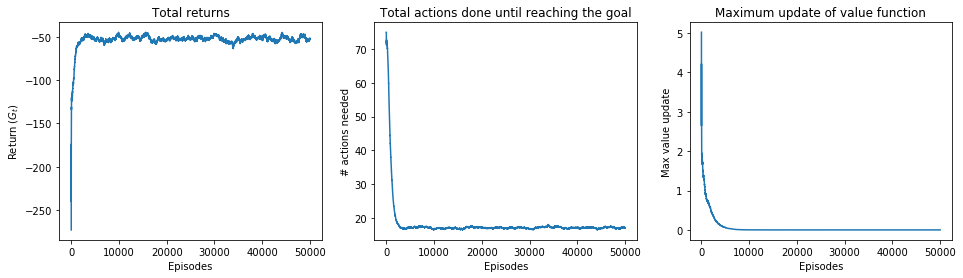

Actions needed: 17.1238
Expected return: -52.6054


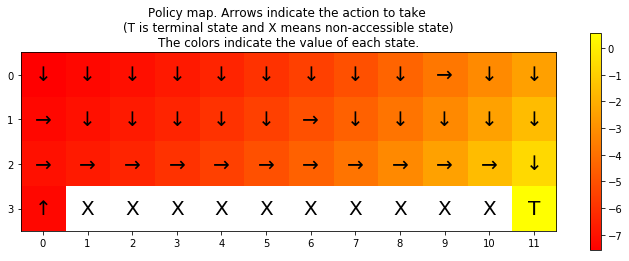

In [7]:
env = gym.make("Cliff-v0")
agent = DoubleQLearningAgent(alpha = 0.05, epsilon = 0.1, n_actions=int(env.action_space.n))

returns_dqlearning, total_actions_dqlearning = train_agent(agent, env, sarsa_like_training=False)
# Average state action values
state_action_value = {}
for state in agent.state_action_value[0].keys():
    for action in range(env.action_space.n):
        if not state in state_action_value:
            state_action_value[state]={}
        state_action_value[state][action] = agent.state_action_value[0][state][action]/2
        state_action_value[state][action] += agent.state_action_value[1][state][action]/2
plot_policy(state_action_value, gridworld_size=[4,12], terminal_state=[3,11])

## Comparison 

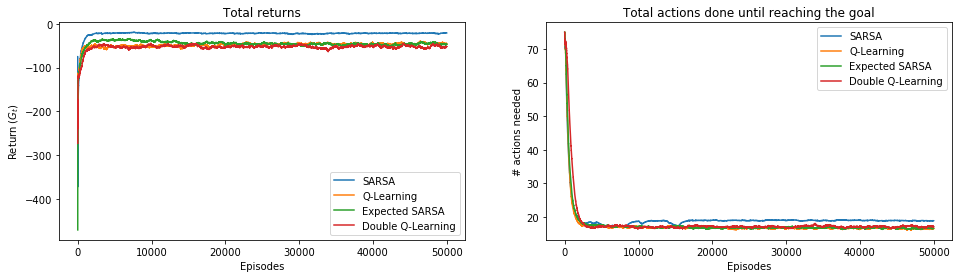

In [8]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(pd.Series(returns_sarsa).ewm(span=1000).mean())
plt.plot(pd.Series(returns_qlearning).ewm(span=1000).mean())
plt.plot(pd.Series(returns_expsarsa).ewm(span=1000).mean())
plt.plot(pd.Series(returns_dqlearning).ewm(span=1000).mean())
plt.legend(["SARSA", "Q-Learning", "Expected SARSA", "Double Q-Learning"])
plt.title("Total returns")
plt.xlabel("Episodes")
plt.ylabel("Return ($G_t$)")

plt.subplot(122)
plt.plot(pd.Series(total_actions_sarsa).ewm(span=1000).mean())
plt.plot(pd.Series(total_actions_qlearning).ewm(span=1000).mean())
plt.plot(pd.Series(total_actions_expsarsa).ewm(span=1000).mean())
plt.plot(pd.Series(total_actions_dqlearning).ewm(span=1000).mean())
plt.legend(["SARSA", "Q-Learning", "Expected SARSA", "Double Q-Learning"])
plt.title("Total actions done until reaching the goal")
plt.xlabel("Episodes")
plt.ylabel("# actions needed")
plt.show()